In [133]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus = False)
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

symbol_cola = fdr.DataReader('KO','2000','2023-12') #가져올 데이터와 년도 설정
symbol_starbucks = fdr.DataReader('SBUX','2000','2023-12') #가져올 데이터와 년도 설정
symbol_nvidia = fdr.DataReader('NVDA','2000','2023-12') #가져올 데이터와 년도 설정

In [134]:

buy_price_cola = symbol_cola.loc['2000-11'].iloc[0].loc['Close']
sell_price_cola = symbol_cola.loc['2001-04'].iloc[-1].loc['Close']

buy_price_starbucks = symbol_starbucks.loc['2000-11'].iloc[0].loc['Close']
sell_price_starbucks = symbol_starbucks.loc['2001-04'].iloc[-1].loc['Close']

buy_price_nvidia = symbol_nvidia.loc['2000-11'].iloc[0].loc['Close']
sell_price_nvidia = symbol_nvidia.loc['2001-04'].iloc[-1].loc['Close']

In [135]:
buy_price_cola,sell_price_cola, buy_price_starbucks,sell_price_starbucks, buy_price_nvidia,sell_price_nvidia

(30.4375,
 23.094999313354492,
 5.570312976837158,
 4.837500095367432,
 0.2588540017604828,
 0.3470830023288727)

In [136]:
# 초기 설정
cum_rateofreturn_cola = 1
cum_rateofreturn_starbucks = 1
cum_rateofreturn_nvidia = 1

# 연도별 투자 수익률 계산
for year in range(2000,2023):
    buy_year_month = str(year) + '-11'
    sell_year_month = str(year+1) + '-04'
    
    # 매수 매도 가격 가져오기
    buy_price_cola = symbol_cola.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_cola = symbol_cola.loc[sell_year_month].iloc[-1].loc['Close']
    
    buy_price_starbucks = symbol_starbucks.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_starbucks = symbol_starbucks.loc[sell_year_month].iloc[-1].loc['Close']
    
    buy_price_nvidia = symbol_nvidia.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_nvidia = symbol_nvidia.loc[sell_year_month].iloc[-1].loc['Close']
    
    # 연도별 수익률 계산
    rateofreturn_cola = sell_price_cola / buy_price_cola
    rateofreturn_starbucks = sell_price_starbucks / buy_price_starbucks
    rateofreturn_nvidia = sell_price_nvidia / buy_price_nvidia
    
    # 누적 수익률 계산
    cum_rateofreturn_cola = cum_rateofreturn_cola * rateofreturn_cola
    cum_rateofreturn_starbucks = cum_rateofreturn_starbucks * rateofreturn_starbucks
    cum_rateofreturn_nvidia = cum_rateofreturn_nvidia * rateofreturn_nvidia

# 최종 결과    
cum_rateofreturn_cola, cum_rateofreturn_starbucks, cum_rateofreturn_nvidia

(1.5125256747585, 5.595476391595467, 31.058784307938794)

In [137]:
# CAGR 전략

ranges = 23 
CAGR_cola = ((cum_rateofreturn_cola ** (1/ranges)) - 1) * 100
CAGR_starbucks = ((cum_rateofreturn_starbucks ** (1/ranges)) - 1) * 100
CAGR_nvidia = ((cum_rateofreturn_nvidia ** (1/ranges)) - 1) * 100

CAGR_cola, CAGR_starbucks, CAGR_nvidia

(1.8153276699481857, 7.774162110046401, 16.112128108155744)

In [138]:
# 단순보유수익률

simple_cum_rateofreturn_cola = symbol_cola.iloc[-1].loc['Close'] / symbol_cola.loc['2000-11'].iloc[0].loc['Close']
simple_cum_rateofreturn_starbucks = symbol_starbucks.iloc[-1].loc['Close'] / symbol_starbucks.loc['2000-11'].iloc[0].loc['Close']
simple_cum_rateofreturn_nvidia = symbol_nvidia.iloc[-1].loc['Close'] / symbol_nvidia.loc['2000-11'].iloc[0].loc['Close']

simple_CAGR_cola = ((simple_cum_rateofreturn_cola ** (1/ranges)) - 1) * 100
simple_CAGR_starbucks = ((simple_cum_rateofreturn_starbucks ** (1/ranges)) - 1) * 100
simple_CAGR_nvidia = ((simple_cum_rateofreturn_nvidia ** (1/ranges)) - 1) * 100

simple_CAGR_cola, simple_CAGR_starbucks, simple_CAGR_nvidia

(2.8767993591097607, 13.342903366246484, 25.350661464648304)

### MDD
- 데이터에서 **MDD (Maximum Drawdown)**를 구해 이 전략의 최대 손실을 계산

In [139]:
symbol_cola['코카콜라 전고점'] = symbol_cola['Close'].cummax()
symbol_starbucks['스타벅스 전고점'] = symbol_starbucks['Close'].cummax()
symbol_nvidia['엔비디아 전고점'] = symbol_nvidia['Close'].cummax()

In [140]:
symbol_cola['DD_cola'] = (1 - (symbol_cola['Close'] / symbol_cola['코카콜라 전고점'])) * 100
symbol_starbucks['DD_starbucks'] = (1 - (symbol_starbucks['Close'] / symbol_starbucks['스타벅스 전고점'])) * 100
symbol_nvidia['DD_nvidia'] = (1 - (symbol_nvidia['Close'] / symbol_nvidia['엔비디아 전고점'])) * 100

In [141]:
symbol_cola['DD_cola'].max() , symbol_starbucks['DD_starbucks'].max() , symbol_nvidia['DD_nvidia'].max()

(44.568224755403044, 81.90764601805007, 89.72243204243779)

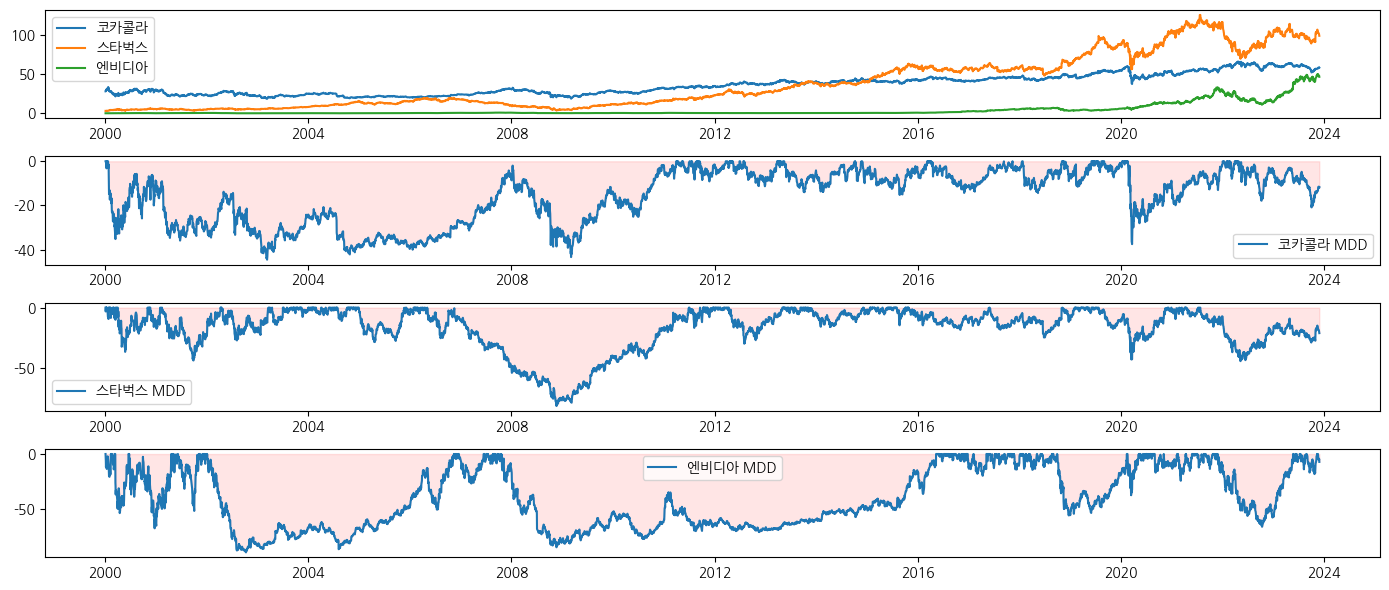

In [142]:
fig, axes = plt.subplots(4,1, figsize=(14,6))

# 종가 기준의 그래프?
axes[0].plot(symbol_cola.index, symbol_cola['Close'] , label = '코카콜라')
axes[0].plot(symbol_starbucks.index, symbol_starbucks['Close'] , label = '스타벅스')
axes[0].plot(symbol_nvidia.index, symbol_nvidia['Close'], label = '엔비디아')
axes[0].legend()

# MDD
axes[1].plot(symbol_cola.index, symbol_cola['DD_cola']*-1 , label = '코카콜라 MDD')
axes[1].fill_between(symbol_cola.index, symbol_cola['DD_cola']*-1, alpha = 0.1, color = 'red')
axes[1].legend()

axes[2].plot(symbol_starbucks.index, symbol_starbucks['DD_starbucks']*-1 , label = '스타벅스 MDD')
axes[2].fill_between(symbol_starbucks.index, symbol_starbucks['DD_starbucks']*-1, alpha = 0.1, color = 'red')
axes[2].legend()

axes[3].plot(symbol_nvidia.index, symbol_nvidia['DD_nvidia']*-1 , label = '엔비디아 MDD')
axes[3].fill_between(symbol_nvidia.index, symbol_nvidia['DD_nvidia']*-1, alpha = 0.1, color = 'red')
axes[3].legend()

plt.tight_layout()
plt.show()

In [143]:
buy_price_cola = symbol_cola.loc['2000-11'].iloc[0].loc['Close']
sell_price_cola = symbol_cola.loc['2001-04'].iloc[-1].loc['Close']

buy_price_starbucks = symbol_starbucks.loc['2000-11'].iloc[0].loc['Close']
sell_price_starbucks = symbol_starbucks.loc['2001-04'].iloc[-1].loc['Close']

buy_price_nvidia = symbol_nvidia.loc['2000-11'].iloc[0].loc['Close']
sell_price_nvidia = symbol_nvidia.loc['2001-04'].iloc[-1].loc['Close']

cum_rateofreturn_cola = 1
cum_rateofreturn_starbucks = 1
cum_rateofreturn_nvidia = 1

for year in range(2000,2023):
    buy_year_month = str(year) + '-11'
    sell_year_month = str(year) + '-04'
    
    buy_price_cola = symbol_cola.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_cola = symbol_cola.loc[sell_year_month].iloc[-1].loc['Close']
    
    buy_price_starbucks = symbol_starbucks.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_starbucks = symbol_starbucks.loc[sell_year_month].iloc[-1].loc['Close']
    
    buy_price_nvidia = symbol_nvidia.loc[buy_year_month].iloc[0].loc['Close']
    sell_price_nvidia = symbol_nvidia.loc[sell_year_month].iloc[-1].loc['Close']
    
    rateofreturn_cola = sell_price_cola / buy_price_cola
    rateofreturn_starbucks = sell_price_starbucks / buy_price_starbucks
    rateofreturn_nvidia = sell_price_nvidia / buy_price_nvidia
    
    cum_rateofreturn_cola = cum_rateofreturn_cola * rateofreturn_cola
    cum_rateofreturn_starbucks = cum_rateofreturn_starbucks * rateofreturn_starbucks
    cum_rateofreturn_nvidia = cum_rateofreturn_nvidia * rateofreturn_nvidia
    
cum_rateofreturn_cola, cum_rateofreturn_starbucks, cum_rateofreturn_nvidia

(0.5570291226221448, 0.18502902796009646, 0.20782377715406497)